In [33]:
import pandas as pd

from IPython.display import display

# Load the CSV file

file_path = r'C:\Users\BENSON KAMAU\OneDrive\Desktop\Projectz\IC\CLEANED DATA.csv'


data = pd.read_csv(file_path)

# Display the dataframe to understand its structure
data.head()


,REP NAME,REGION,CATEGORY,SUPERVISOR,CUSTOMER ID,CUSTOMER CODE,CUSTOMER NAME,CUSTOMER CATEGORY,CHANNEL TYPE,ACCOUNT NAME,...,PRODUCT,BRAND NAME,PRODUCT DESCRIPTION,STOCK LEVEL,QUANTITY,PRESSURE TARGET,PRESSURE TARGET %,REASON,NOTES,DATE REPORTED
0,FRIDAH NJAGE,COAST,MERCHANDISER,NaN,49,49,CARREFOUR DIANI,SUPERMARKET,MODERN TRADE,CARREFOUR,...,SHOE CARE,KIWI PASTE SHOE POLISH,SHOE POLISH 15ML BLACK LOCAL,Available,NaN,NaN,NaN,NaN,NaN,28-02-23 09:51
1,FRIDAH NJAGE,COAST,MERCHANDISER,NaN,49,49,CARREFOUR DIANI,SUPERMARKET,MODERN TRADE,CARREFOUR,...,SHOE CARE,KIWI PASTE SHOE POLISH,SHOE POLISH 200ML BLACK,Available,NaN,NaN,NaN,NaN,NaN,28-02-23 09:51
2,FRIDAH NJAGE,COAST,MERCHANDISER,NaN,49,49,CARREFOUR DIANI,SUPERMARKET,MODERN TRADE,CARREFOUR,...,SHOE CARE,KIWI PASTE SHOE POLISH,SHOE POLISH 25ML T/RED,Not Available,NaN,NaN,NaN,Not Listed,NaN,28-02-23 09:51
3,FRIDAH NJAGE,COAST,MERCHANDISER,NaN,49,49,CARREFOUR DIANI,SUPERMARKET,MODERN TRADE,CARREFOUR,...,SHOE CARE,KIWI SHOE CREAMS,KIWI S/CREAM 100ML HDP NEUTRAL,Available,NaN,NaN,NaN,NaN,NaN,28-02-23 09:51
4,FRIDAH NJAGE,COAST,MERCHANDISER,NaN,49,49,CARREFOUR DIANI,SUPERMARKET,MODERN TRADE,CARREFOUR,...,SHOE CARE,KIWI PASTE SHOE POLISH,SHOE POLISH 40ML MID BROWN,Available,NaN,NaN,NaN,NaN,NaN,28-02-23 09:51


In [34]:
data.isna().sum()

REP NAME                  0
REGION                    0
CATEGORY                  0
SUPERVISOR             2992
CUSTOMER ID               0
CUSTOMER CODE             0
CUSTOMER NAME             0
CUSTOMER CATEGORY         0
CHANNEL TYPE             68
ACCOUNT NAME              0
CUSTOMER LOCATION      2788
PRODUCT CODE              0
PRODUCT                   0
BRAND NAME                0
PRODUCT DESCRIPTION       0
STOCK LEVEL               0
QUANTITY               2992
PRESSURE TARGET        2992
PRESSURE TARGET %      2992
REASON                 2182
NOTES                  2992
DATE REPORTED             0
dtype: int64

In [50]:
#unique values in the data
data.nunique()


REP NAME               17
REGION                  6
CATEGORY                1
SUPERVISOR              0
CUSTOMER ID            43
CUSTOMER CODE          43
CUSTOMER NAME          43
CUSTOMER CATEGORY       1
CHANNEL TYPE            2
ACCOUNT NAME            4
CUSTOMER LOCATION       3
PRODUCT CODE           67
PRODUCT                 4
BRAND NAME             14
PRODUCT DESCRIPTION    68
STOCK LEVEL             3
QUANTITY                0
PRESSURE TARGET         0
PRESSURE TARGET %       0
REASON                  5
NOTES                   0
DATE REPORTED          42
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REP NAME             2992 non-null   object 
 1   REGION               2992 non-null   object 
 2   CATEGORY             2992 non-null   object 
 3   SUPERVISOR           0 non-null      float64
 4   CUSTOMER ID          2992 non-null   int64  
 5   CUSTOMER CODE        2992 non-null   int64  
 6   CUSTOMER NAME        2992 non-null   object 
 7   CUSTOMER CATEGORY    2992 non-null   object 
 8   CHANNEL TYPE         2924 non-null   object 
 9   ACCOUNT NAME         2992 non-null   object 
 10  CUSTOMER LOCATION    204 non-null    object 
 11  PRODUCT CODE         2992 non-null   float64
 12  PRODUCT              2992 non-null   object 
 13  BRAND NAME           2992 non-null   object 
 14  PRODUCT DESCRIPTION  2992 non-null   object 
 15  STOCK LEVEL          2992 non-null   o

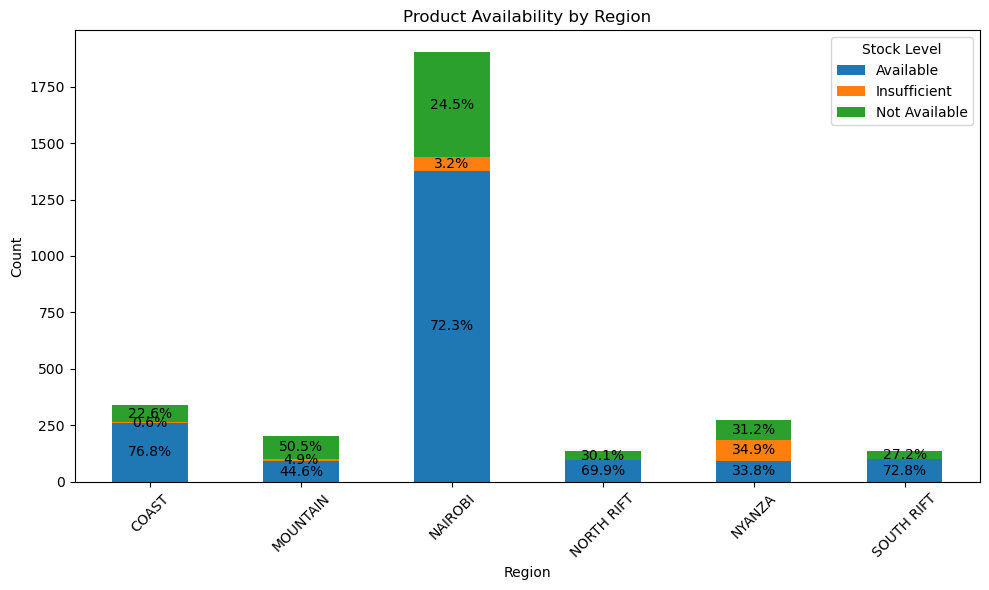

In [46]:
# Calculating percentages for each region
availability_percent = availability_by_region.div(availability_by_region.sum(axis=1), axis=0) * 100

# Plotting the availability by region with percentages
fig, ax = plt.subplots(figsize=(10, 6))

availability_by_region.plot(kind='bar', stacked=True, ax=ax)

# Adding percentages on the bars
for container in ax.containers:
    labels = [f'{height/availability_by_region.sum(axis=1)[i] * 100:.1f}%' if height > 0 else '' 
              for i, height in enumerate(container.datavalues)]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Product Availability by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Stock Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


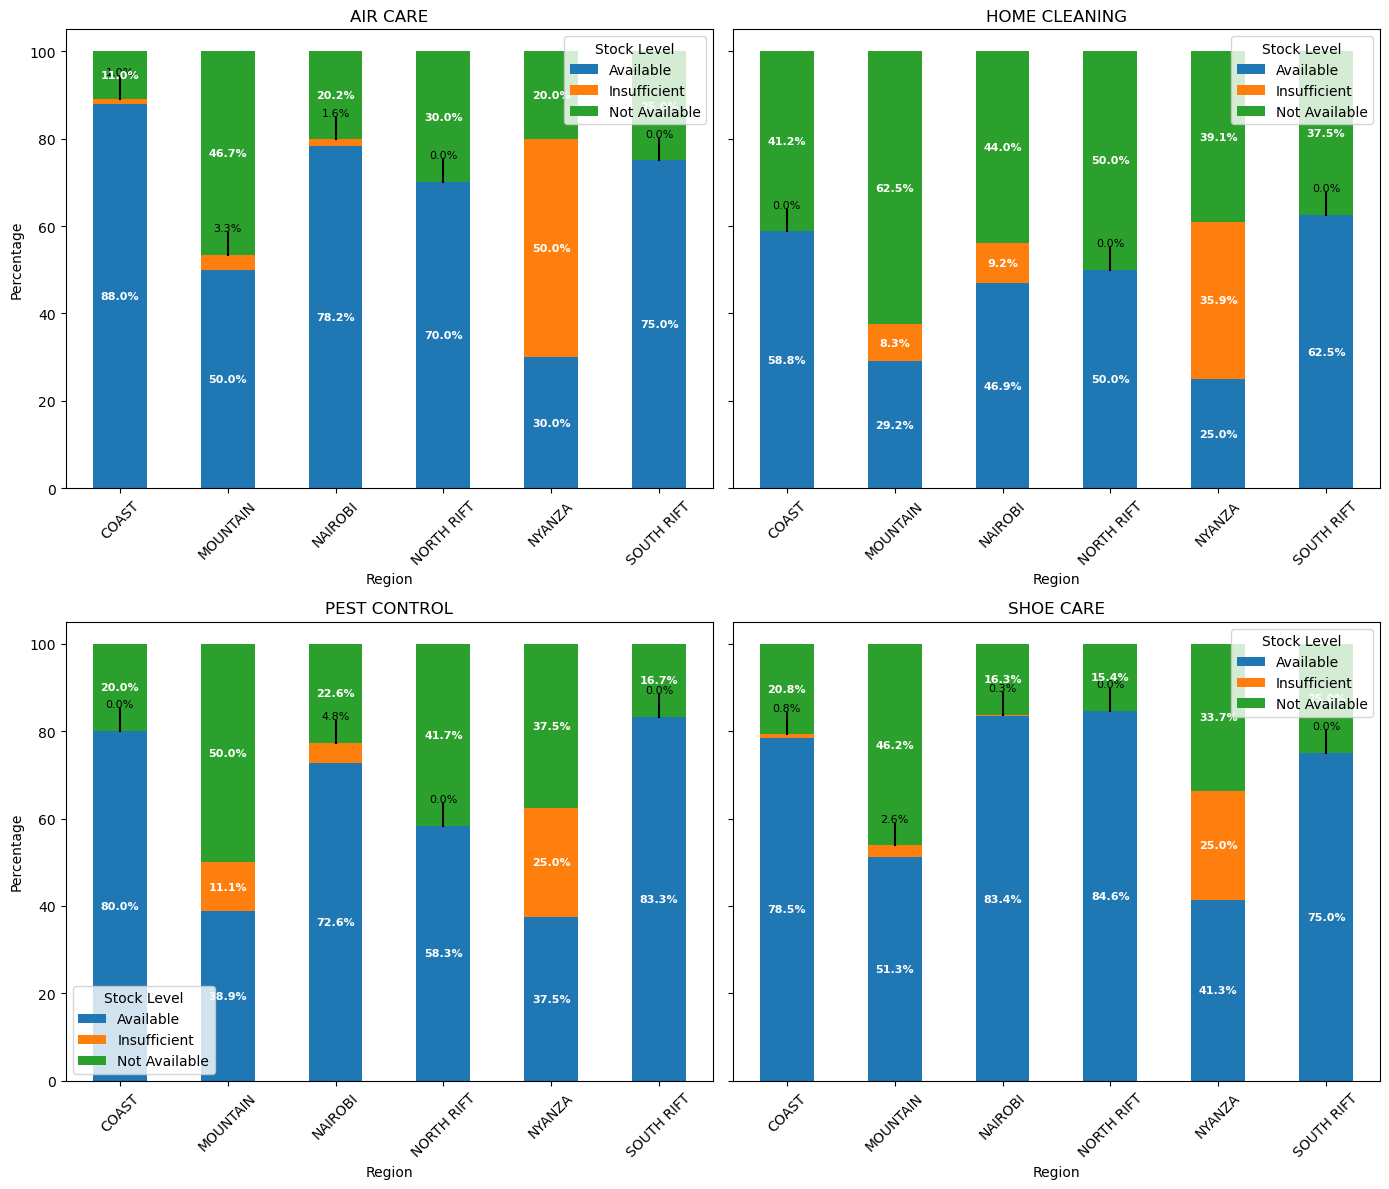

In [47]:
# Grouping the filtered data by region, product, and availability status and calculating percentages
availability_by_region_product_percentage = filtered_data.groupby(['REGION', 'PRODUCT', 'STOCK LEVEL']).size().unstack(fill_value=0)
availability_by_region_product_percentage = availability_by_region_product_percentage.div(availability_by_region_product_percentage.sum(axis=1), axis=0) * 100

# Creating a separate plot for each product with percentages on the y-axis
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

for ax, (product, group) in zip(axes.flatten(), availability_by_region_product_percentage.groupby(level=1)):
    group = group.droplevel(1)
    group.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(product)
    ax.set_xlabel('Region')
    ax.set_ylabel('Percentage')
    ax.legend(title='Stock Level')
    ax.set_xticklabels(group.index, rotation=45)
    
    # Adding percentages on the bars
    for idx, region in enumerate(group.index):
        for bar_idx, (level, percentage) in enumerate(group.loc[region].items()):
            if percentage > 5:  # Only display the percentages for significant values
                ax.text(idx, sum(group.loc[region][:bar_idx+1]) - percentage/2, f'{percentage:.1f}%', ha='center', va='center', color='white', weight='bold', fontsize=8)
            else:
                ax.plot([idx, idx], [sum(group.loc[region][:bar_idx+1]), sum(group.loc[region][:bar_idx+1]) + 5], color='black')
                ax.text(idx, sum(group.loc[region][:bar_idx+1]) + 5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


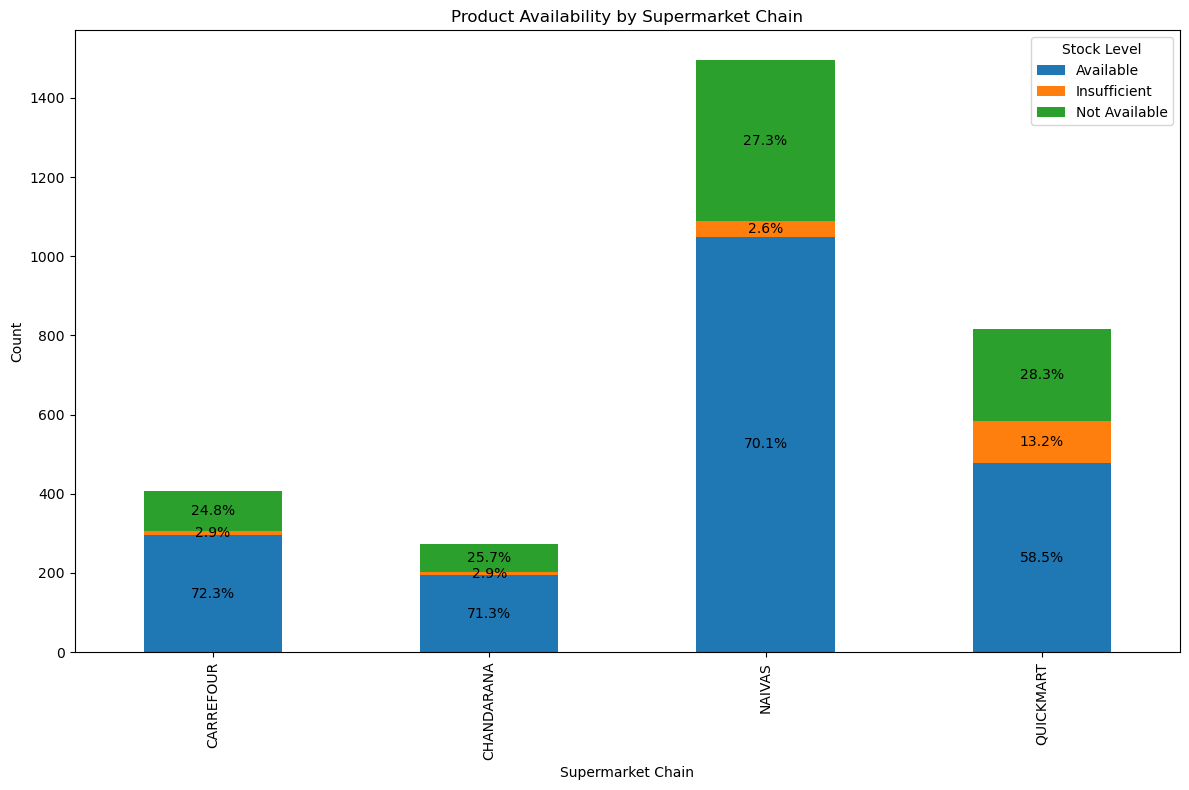

In [48]:
# Grouping the data by account name and availability status
availability_by_account = data.groupby(['ACCOUNT NAME', 'STOCK LEVEL']).size().unstack(fill_value=0)

# Plotting the availability by account name
fig, ax = plt.subplots(figsize=(12, 8))

availability_by_account.plot(kind='bar', stacked=True, ax=ax)

# Adding percentages on the bars
for container in ax.containers:
    labels = [f'{height/availability_by_account.sum(axis=1)[i] * 100:.1f}%' if height > 0 else '' 
              for i, height in enumerate(container.datavalues)]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Product Availability by Supermarket Chain')
plt.xlabel('Supermarket Chain')
plt.ylabel('Count')
plt.legend(title='Stock Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


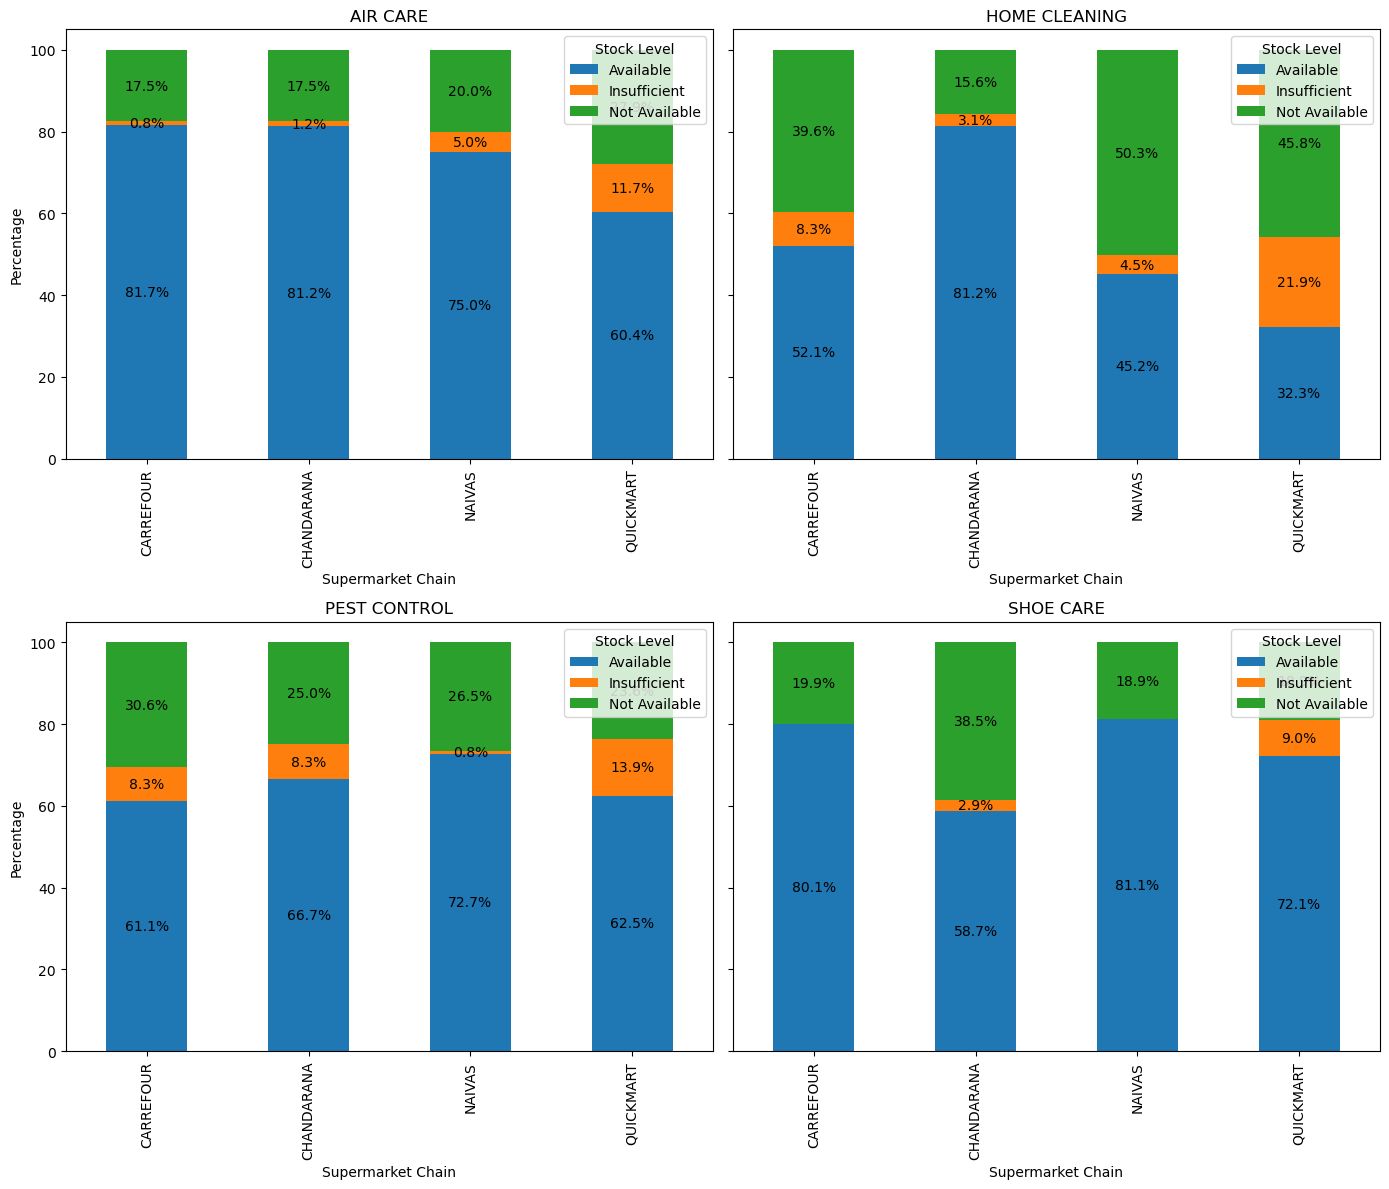

In [49]:
# Grouping the data by account name and availability status, then filtering by product
availability_by_account_product_percentage = filtered_data.groupby(['ACCOUNT NAME', 'PRODUCT', 'STOCK LEVEL']).size().unstack(fill_value=0)
availability_by_account_product_percentage = availability_by_account_product_percentage.div(availability_by_account_product_percentage.sum(axis=1), axis=0) * 100

# Creating a separate plot for each product with percentages on the y-axis
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

for ax, (product, group) in zip(axes.flatten(), availability_by_account_product_percentage.groupby(level=1)):
    group = group.droplevel(1)
    group.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(product)
    ax.set_xlabel('Supermarket Chain')
    ax.set_ylabel('Percentage')
    ax.legend(title='Stock Level')
    ax.set_xticklabels(group.index, rotation=90)
    
    # Adding percentages on the bars
    for container in ax.containers:
        labels = [f'{height:.1f}%' if height > 0 else '' for height in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center')

plt.tight_layout()
plt.show()


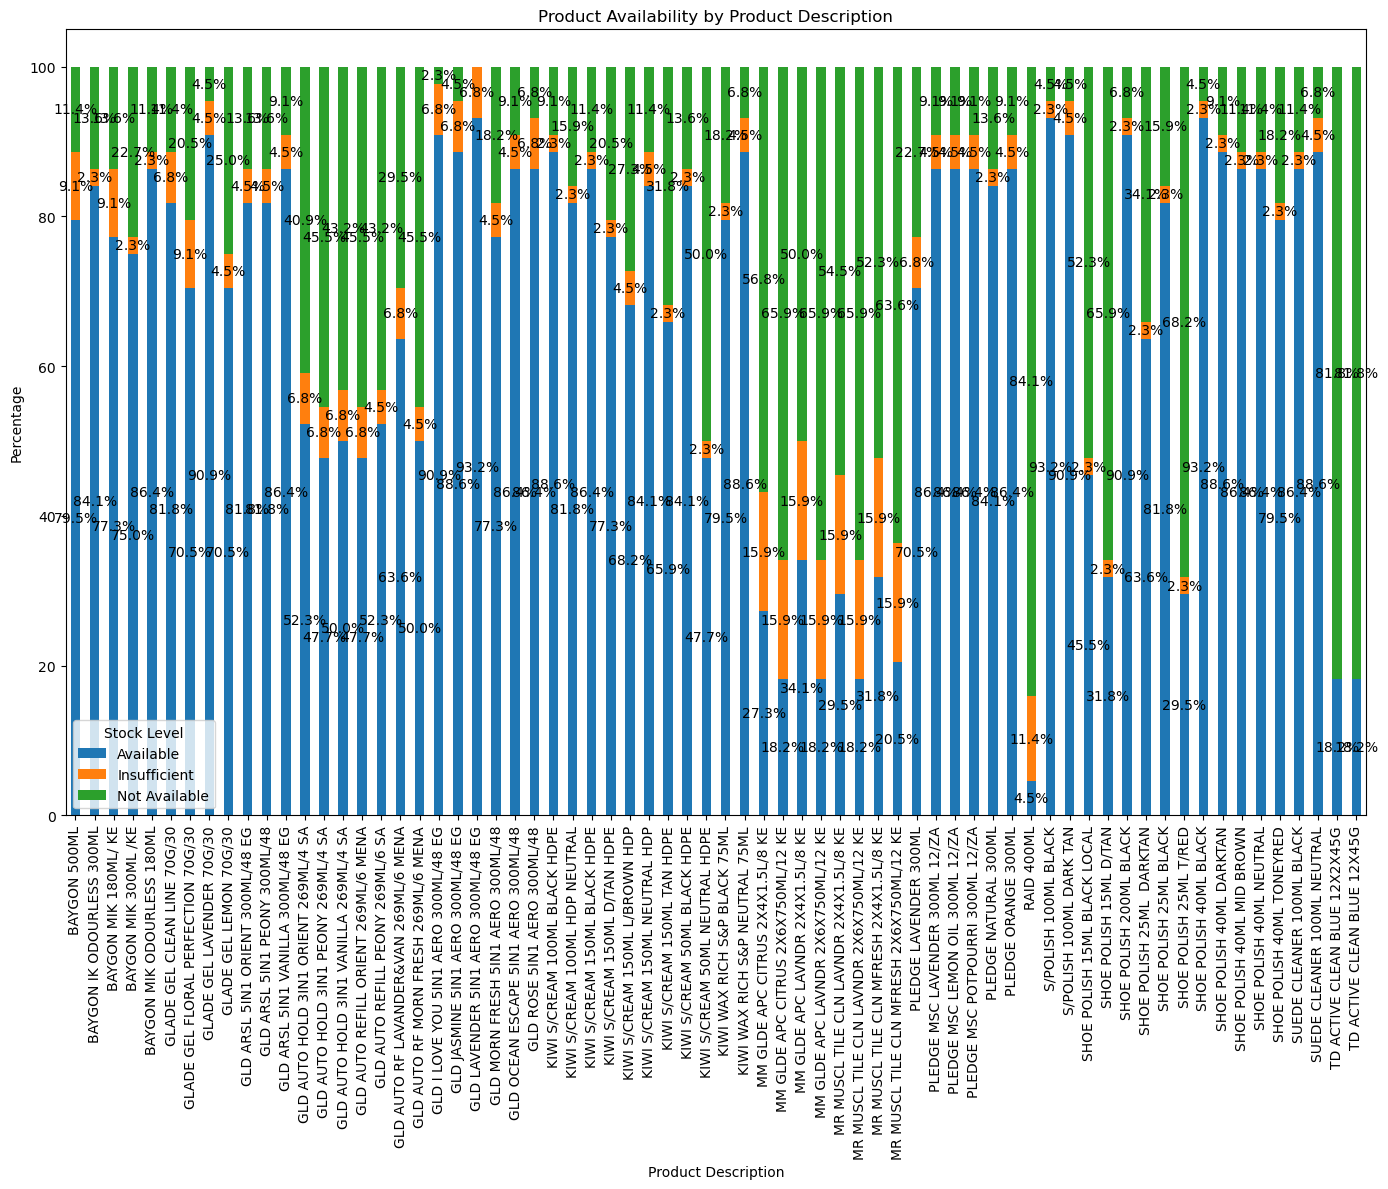

In [51]:
# Grouping the data by product description and availability status
availability_by_description = data.groupby(['PRODUCT DESCRIPTION', 'STOCK LEVEL']).size().unstack(fill_value=0)

# Calculating percentages
availability_by_description_percentage = availability_by_description.div(availability_by_description.sum(axis=1), axis=0) * 100

# Plotting the availability by product description with percentages on the y-axis
fig, ax = plt.subplots(figsize=(14, 12))

availability_by_description_percentage.plot(kind='bar', stacked=True, ax=ax)

# Adding percentages on the bars
for container in ax.containers:
    labels = [f'{height:.1f}%' if height > 0 else '' for height in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.title('Product Availability by Product Description')
plt.xlabel('Product Description')
plt.ylabel('Percentage')
plt.legend(title='Stock Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
